## Want to have a spell checker for Jupyter? 

Open Anaconda Prompt (Windows) or Terminal (Mac) and use the following commands (no ticks \` if you are copying from the raw notebook):

`pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable spellchecker/main`

To install `Rise`, which is an add-on for Jupyter notebooks to create slide shows:

`conda install -c conda-forge rise`

# 1.2 Getting Started with the NLTK
Natural Language Toolkit

Start by importing the nltk and installing the book files that we are going to use this semester. You will see a download option pop up after you run the next chunk. Double click on the "book" collection to install the information we need for the semester. 

In [1]:
import nltk
import matplotlib.pyplot as plt 
#nltk.download()

Next step is to import the information you will need for an analysis using the import function. 

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


You can view the variables by typing them and running it - remember Spyder can show you these in the variable explorer. 

In [3]:
print(text1)

<Text: Moby Dick by Herman Melville 1851>


# 1.3 Searching Text

The concordance function: shows every occurrence of a specific word. 

*name_of_variable*.concordance("*thing to search for*")

Try changing the word you are searching for or the text file that you are searching.

In [34]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


The similar function: find the words that are used in the same context as the selected word. 

*name_of_variable*.similar("*thing to search for*")

In [5]:
text1.similar("monstrous")
print() #I used this to create a space in the output
text2.similar("monstrous")
text2

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


<Text: Sense and Sensibility by Jane Austen 1811>

The common_contexts function: looks at two or more words and gives you the contexts shared by those words. 

*name_of_variable*.common_contexts(["*thing to search for*", "*thing to search for*"])

In [6]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


Dispersion plots: showing where specific words are located in a text in relation to other words. Each row is the text, while the lines on the plot show the location of the word for that row. 

**NOTE:** To get the plot to display inline here in Jupyter, I had to import the display function from IPython package. If this does not work, try installing ghostscript and try again ( https://wiki.scribus.net/canvas/Installation_and_Configuration_of_Ghostscript ).

*name_of_variable*.dispersion_plot(["list words", "list words"])

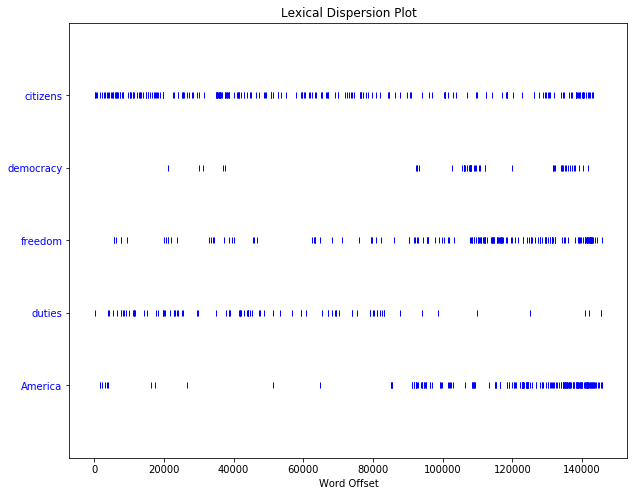

<Text: Inaugural Address Corpus>


In [38]:
from IPython.display import display
plt.figure(figsize=(10, 8))
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])
print(text4)

**Note:** The generate function has been taken out of NLTK3+.

# 1.4 Counting Vocabulary

The len function: tells you the length of an object, in this case the number of words in a text. 

len(*name_of_variable*)

In [40]:
print(len(text3))
print(text3)

44764
<Text: The Book of Genesis>


Reminder of some terms we learned in lecture:

**Tokens**: sequence of characters that we want to treat as a group. In this example, we have len() to tell us the number of words, but how many **types** (or unique words) are there?

The set function: takes a variable and creates a unique list of the objects in it. All duplicates will be collapsed together (however, remember that spaces and punctuation can cause you issues - to be dealt with at a later time on how to clean up the data).

set(*name_of_variable*)

If we were to run set(text3), we would see all the words in text3. If you want to get those in alphabetical order use:

The sorted function: sorts a list of objects.

sorted(*name_of_variable*) - or in this case sorted(set(*name_of_variable*))

In [42]:
#print(sorted(set(text3))) #take off the comment and run this to see what it looks like, it prints a large list of unique tokens for our text.
len(set(text3))


2789

**Lexical Richness**: percent of the number of distinct words (types) is of the total word count.

In [10]:
len(set(text3)) / len(text3)

0.06230453042623537

The count function: allows you to count the number of times something has occurred.

*name_of_variable*.count("*thing to count*")

In [49]:
#to get raw word count
print(text3.count("smote")) #why did I use print here
print(100 * text3.count("smote") / len(text3))
#to get percentage
100 * text4.count("a") / len(text4)

5
0.01116968992940756


1.4643016433938312

To calculate the percent for lots of words might take a long time if we continued to use the code above. Instead, we can write our own function to shorten that task.

The def function: allows you to define a function of your own naming (don't use function names we've already encountered). Spacing here is important! When you create a code *block*, you will need to space/tab over to indicate that the code is still part of the lines before it. It will look something like this:

def *name_of_function*(*name_of_objects_to_expect*):
    return *things you want the function to do*

Note that Jupyter understands that you are wanting to create a block of code, so it spaces over for you when you hit the enter key after the colon :. The names of objects to expect are called arguments - these are temporary place holders for the values that the user should fill in. 

In [53]:
def lexical_diversity(text):
    return 100 * len(set(text)) / len(text) #why didn't I use text1? What is text here?

lexical_diversity(text3) #note we made this a percentage

6.2304530426235365

In [55]:
def percent_text(count, total):
    return 100 * count / total

percent_text(text4.count("a"), len(text4))

6.3684084125295914

# 2 Lists, Variables, Strings

Texts are structured information - even though we often think of language as "unstructured data". For our purposes, we are going to think of texts as a giant "bag of words" with punctuation. However, in Python, they are often represented as lists. 

Several lists have been created as part of NLTK, so we have already imported them from running our import function earlier. If we had wanted to create a list we could use:

*name_of_variable* = ["some", "text", "here", "."]

In [56]:
erin_example = ["some", "text", "here", "."]

print(erin_example)
print(sent1)
print(len(erin_example))
print(lexical_diversity(sent1))

['some', 'text', 'here', '.']
['Call', 'me', 'Ishmael', '.', 'Some']
4
100.0


You can do all sorts of things with lists. Here are some examples:

- add them together: sent4+sent1 just *concatenates* (or combines) the two lists together.
- add new things to a list - append
- index (find things) in the list using numbers and slicing 

The append function: adds information to the end of a list.

*name_of_variable*.append("text")

In [63]:
sent1.append("Some")
print(sent1)
sent1 + sent4

['Call',
 'me',
 'Ishmael',
 '.',
 'Some',
 'Some',
 'Some',
 'Some',
 'Some',
 'Some',
 'Some',
 'Some',
 'Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':']

Indexing: finding specific areas of a list. Python is **zero-indexing** language. Many of you likely know *R* - be sure to remember that the first item/row/etc. in Python is ZERO not ONE. 

The index function: this function will tell you where something is located.

*name_of_variable*.index("text")

In [65]:
print(text4[173]) #pulls the 174th item
print(text4.index("awaken"))

awaken
173


Slicing: picking a set of objects from a list - for example, items number 5 through 10 in a list, rather than 5, then 6, then 7...

Use the colon to denote you want number **up until** number. For example, 5:10 is 5, 6, 7, 8, 9 ... this does not include 10 (another confusing thing if you are a *R* person). 

If you leave the number blank before the colon, you will get the beginning of the list up until the number ( :4 is 0, 1, 2, 3) and the reverse is true for a blank after the colon (for a list of 10 objects 5: gives you 5, 6, 7, 8, 9)

In [17]:
listofthings = [1,2,3,4,5,6,7,8,9,10]
print(listofthings[1])
print(listofthings[:4])
print(listofthings[5:])


2
[1, 2, 3, 4]
[6, 7, 8, 9, 10]


Some reminders about variable names:
- Cannot use reserved words
- Try not to use function names (like print, len, etc.)
- Cannot start with a number
- Capitalization matters
- No spaces or minus signs (-)

Everything we've been working with have been strings (characters), but they have been stored in lists. Individual strings can be "added" or "multiplied" or sliced as described above. 

# 3 Computing Simple Statistics on Language

The FreqDist function: creates a **frequency distribution** or a histogram of the frequency of each token in a text.

FreqDist(*name_of_variable*)

The most_common function: displays a set number of the most frequent tokens.

*name_of_saved_FreqDist*.most_common(number)

In [18]:
fdist1 = FreqDist(text1) #we are saving it to use it
print(fdist1) 
fdist1.most_common(10)

<FreqDist with 19317 samples and 260819 outcomes>


[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

These first words are the worker-bees of language - prepositions and determinants. Since we are looking at Moby Dick, let's try looking for the specific noun whale.

In [67]:
fdist1["whale"]

906

A noun that occurs that many times is quite a lot. Let's make a frequency distribution for book to view what else there might be.

The plot function: this function varies based on what you are doing, but here we are going to use it to make a cumulative frequency plot (rather than a histogram type frequency distribution).

*name_of_variable*.plot(*number of items to plot*, cumulative = True)

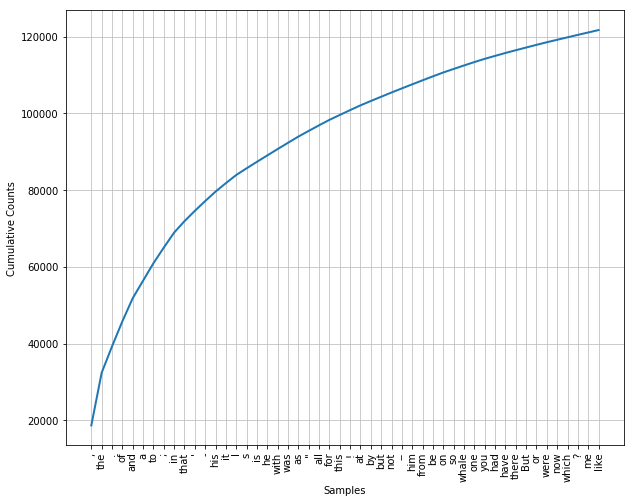

In [20]:
plt.figure(figsize=(10, 8))
fdist1.plot(50, cumulative=True)

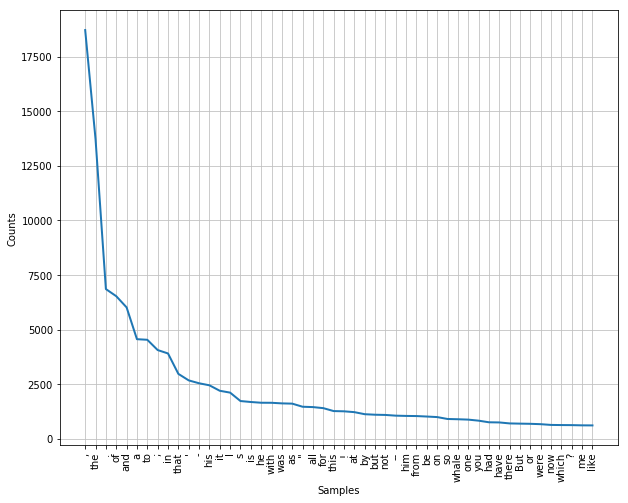

In [21]:
plt.figure(figsize=(10, 8))
fdist1.plot(50, cumulative=False)

What can we determine between these two plots? 

We might also consider the *least* frequent words - *hapaxes*.

The hapaxes function: words that only appear once in the text.

*name_of_variable*.hapaxes()

In [22]:
fdist1.hapaxes()[0:10]

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly']

# 3.2 Choosing Specific Subsets 

Let's say we wanted to find all words with specific characteristics. You could define the subset in any particular way (all words that are 15 characters or longer, all words that start with b, etc.). 

How would we do that? We would need to find the information that meets our criteria:

The if function: takes a condition statement (something to verify if true or false) and executes if the condition statement is true.

The for/in function (for loops): takes a set and consecutively runs each item in the set. So, if you say for x in range(0, 3) ... you will get x = 0, x = 1, x = 2, etc. until you run out of items. 

In [23]:
for x in range(0, 3):
    print(x)

0
1
2


In [24]:
V = set(text1) #create the list of all the unique tokens
long_words = [word for word in V if len(word) > 15]
sorted(long_words)

#another way
long_words = []
for word in V:
    if len(word) > 15:
        long_words.append(word)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

In [69]:
#trying a different text and more subset conditional statements
fdist5 = FreqDist(text5)
print(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

for w in set(text5):
    if len(w) > 7:
        if fdist5[w] > 7:
            print(w)

<Text: Chat Corpus>
#talkcity_adults
something
football
........
((((((((((
computer
listening
innocent
everyone
cute.-ass
tomorrow
anything
watching
remember
#14-19teens
actually
seriously
Question
together


# 3.3 Collocations + Bigrams

**Collocations**: Sequence of words that occurs together often.

**Bigrams**: (or n-grams) n-words that occur together, so a bigram are two words that occur together like *peanut butter*.

The bigrams function: creates two-grams from a text.

bigrams(*text you want to work with*) - helps if you put the list() function around it to convert it to something workable with python. 

In [26]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

That function only creates the bigrams for us, what we really want to see is the bigrams that occur more often than you might expect given the frequency of the individual words. For example, you might expect "of the" to be a frequency bigram, but both individual words are also very frequent, so that's not very interesting.

The collocations function: shows frequent bigrams (default), ignoring stop words.

*name_of_variable*.collocations()
- you can also include num = *number of collocations to print*
- as well as window_size = *number of words to include in the n-gram*

In [72]:
text4.collocations()
print()
help(text4.collocations)

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties

Help on method collocations in module nltk.text:

collocations(num=20, window_size=2) method of nltk.text.Text instance
    Print collocations derived from the text, ignoring stopwords.
    
    :seealso: find_collocations
    :param num: The maximum number of collocations to print.
    :type num: int
    :param window_size: The number of tokens spanned by a collocation (default=2)
    :type window_size: int



In [28]:
text4.collocations(num = 10, window_size = 4)

United States; fellow citizens; four years; years ago; men women;
Federal Government; General Government; self government; Vice
President; American people


# 3.4 Counting

We could also figure out word lengths and see the frequency distribution of that combining the things we've learned above. 

The max function: shows you the most frequent item.

*name_of_variable*.max()

The freq function: shows you the frequency of selected item. 

*name_of_variable*.freq(*"thing you are looking for"*)

In [29]:
fdist = FreqDist(len(w) for w in text1)
fdist

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

[(3, 50223), (1, 47933), (4, 42345), (2, 38513), (5, 26597), (6, 17111), (7, 14399), (8, 9966), (9, 6428), (10, 3528), (11, 1873), (12, 1053), (13, 567), (14, 177), (15, 70), (16, 22), (17, 12), (18, 1), (20, 1)]
3
0.19255882431878046


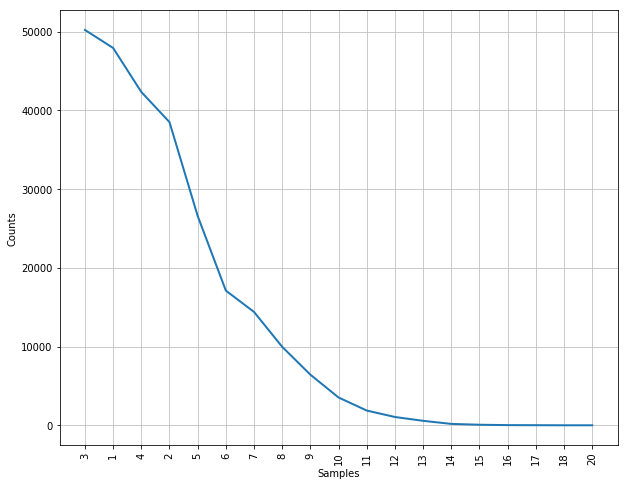

In [30]:
print(fdist.most_common())

print(fdist.max())

print(fdist.freq(3))

plt.figure(figsize=(10, 8))
fdist.plot()

# Numerical Comparison Operators

Operator 	Relationship
< 	less than
<= 	less than or equal to
== 	equal to (note this is two "=" signs, not one)
!= 	not equal to
> 	greater than
>= 	greater than or equal to

# Some Word Comparison Operators

Function 	Meaning
s.startswith(t) test if s starts with t
s.endswith(t) 	test if s ends with t
t in s 	        test if t is a substring of s
s.islower() 	test if s contains cased characters and all are lowercase
s.isupper() 	test if s contains cased characters and all are uppercase
s.isalpha() 	test if s is non-empty and all characters in s are alphabetic
s.isalnum() 	test if s is non-empty and all characters in s are alphanumeric
s.isdigit() 	test if s is non-empty and all characters in s are digits
s.istitle() 	test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals)

Read the sections on loops and iterations - it's ok if you aren't totally comfortable with that section, as you will learn it more as we go. 